# Installations and Imports

In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/BT4222 Project')
os.chdir('Datasets/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install transformers

In [3]:
!pip install -U sentence-transformers

# Import Train and Test data

In [4]:
# Import train and test data from CSV
train_df = pd.read_csv('train_reduced.csv')
test_df = pd.read_csv('test_reduced.csv')

In [5]:
train_df.head(5)

,userId,rating,timestamp_rated,tag,ml_title,tmdbId,cast,crew,keywords,original_title,...,spoken_language_Español,spoken_language_Français,spoken_language_Italiano,has_homepage,gross_profit,roi,profit_margin,tagline_sentiment_score_average,overview_sentiment_score_average,release_year
0,25,4.0,2010-07-01 05:54:30,NaN,Rain Man (1988),380,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...","Hans Zimmer, Linda DeScenna, Louis DiGiaimo, W...","individual, mentally disabled, autism, loss of...",Rain Man,...,0,0,1,0,387800000.0,15.512000,0.939438,0.00000,-0.363350,1988
1,25,3.5,2010-07-01 05:53:13,NaN,One Flew Over the Cuckoo's Nest (1975),510,"Jack Nicholson, Louise Fletcher, Danny DeVito,...","Jane Feinberg, Mike Fenton, Arthur Coburn, Sau...","individual, rebel, self-destruction, wheelchai...",One Flew Over the Cuckoo's Nest,...,0,0,0,0,105981275.0,35.327092,0.972472,-0.47000,-0.220000,1975
2,25,4.5,2010-07-01 05:33:00,NaN,Superbad (2007),8363,"Jonah Hill, Michael Cera, Christopher Mintz-Pl...","Bob Kensinger, Seth Rogen, Seth Rogen, Russ T....","becoming an adult, high school, young people, ...",Superbad,...,0,0,0,1,101463226.0,5.073161,0.835341,0.00000,0.460150,2007
3,25,3.5,2010-07-01 05:51:13,NaN,"Lion King, The (1994)",8587,"Jonathan Taylor Thomas, Matthew Broderick, Jam...","Mark A. Mangini, Hans Zimmer, Richard L. Ander...","loss of parents, wild boar, uncle, shaman, red...",The Lion King,...,0,0,0,1,743241776.0,16.516484,0.942911,0.87895,-0.160750,1994
4,25,3.5,2010-07-01 05:40:01,NaN,Slumdog Millionaire (2008),12405,"Dev Patel, Freida Pinto, Anil Kapoor, Mia Drak...","Anthony Dod Mantle, Danny Boyle, Gail Stevens,...","slum, indian lead, cheating, suspicion, game s...",Slumdog Millionaire,...,0,1,0,1,362910544.0,24.194036,0.960308,0.65880,-0.064667,2008


In [6]:
print("Train Set")
print("Number of unique movies: ", len(train_df['tmdbId'].unique()))
print("Number of unique users: ", len(train_df['userId'].unique()))

print("\nTest Set")
print("Number of unique movies: ", len(test_df['tmdbId'].unique()))
print("Number of unique users: ", len(test_df['userId'].unique()))


Train Set
Number of unique movies:  3881
Number of unique users:  8656

Test Set
Number of unique movies:  3701
Number of unique users:  7809


In [7]:
# Retrieving unique movies from train data set
unique_movies_train = train_df.drop_duplicates(subset=['tmdbId'])
unique_movies_train = unique_movies_train.reset_index()

# Retrieving unique movies from test data set
unique_movies_test = test_df.drop_duplicates(subset=['tmdbId'])
unique_movies_test = unique_movies_test.reset_index()

In [8]:
unique_movies_train.head()

,index,userId,rating,timestamp_rated,tag,ml_title,tmdbId,cast,crew,keywords,...,spoken_language_Español,spoken_language_Français,spoken_language_Italiano,has_homepage,gross_profit,roi,profit_margin,tagline_sentiment_score_average,overview_sentiment_score_average,release_year
0,0,25,4.0,2010-07-01 05:54:30,NaN,Rain Man (1988),380,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...","Hans Zimmer, Linda DeScenna, Louis DiGiaimo, W...","individual, mentally disabled, autism, loss of...",...,0,0,1,0,387800000.0,15.512000,0.939438,0.00000,-0.363350,1988
1,1,25,3.5,2010-07-01 05:53:13,NaN,One Flew Over the Cuckoo's Nest (1975),510,"Jack Nicholson, Louise Fletcher, Danny DeVito,...","Jane Feinberg, Mike Fenton, Arthur Coburn, Sau...","individual, rebel, self-destruction, wheelchai...",...,0,0,0,0,105981275.0,35.327092,0.972472,-0.47000,-0.220000,1975
2,2,25,4.5,2010-07-01 05:33:00,NaN,Superbad (2007),8363,"Jonah Hill, Michael Cera, Christopher Mintz-Pl...","Bob Kensinger, Seth Rogen, Seth Rogen, Russ T....","becoming an adult, high school, young people, ...",...,0,0,0,1,101463226.0,5.073161,0.835341,0.00000,0.460150,2007
3,3,25,3.5,2010-07-01 05:51:13,NaN,"Lion King, The (1994)",8587,"Jonathan Taylor Thomas, Matthew Broderick, Jam...","Mark A. Mangini, Hans Zimmer, Richard L. Ander...","loss of parents, wild boar, uncle, shaman, red...",...,0,0,0,1,743241776.0,16.516484,0.942911,0.87895,-0.160750,1994
4,4,25,3.5,2010-07-01 05:40:01,NaN,Slumdog Millionaire (2008),12405,"Dev Patel, Freida Pinto, Anil Kapoor, Mia Drak...","Anthony Dod Mantle, Danny Boyle, Gail Stevens,...","slum, indian lead, cheating, suspicion, game s...",...,0,1,0,1,362910544.0,24.194036,0.960308,0.65880,-0.064667,2008


In [9]:
unique_movies_test.head()

,index,userId,rating,timestamp_rated,tag,ml_title,tmdbId,cast,crew,keywords,...,spoken_language_Español,spoken_language_Français,spoken_language_Italiano,has_homepage,gross_profit,roi,profit_margin,tagline_sentiment_score_average,overview_sentiment_score_average,release_year
0,0,25,4.0,2010-07-01 05:35:35,NaN,Titanic (1997),597,"Kate Winslet, Leonardo DiCaprio, Frances Fishe...","Mali Finn, James Horner, James Cameron, James ...","shipwreck, iceberg, ship, panic, titanic, ocea...",...,0,1,1,1,1.645034e+09,8.225171,0.891601,0.00000,0.561200,1997
1,1,25,4.0,2010-07-01 05:51:57,NaN,Fight Club (1999),550,"Edward Norton, Brad Pitt, Meat Loaf, Jared Let...","Arnon Milchan, Michael Kaplan, Art Linson, Ale...","support group, dual identity, nihilism, rage a...",...,0,0,0,1,3.785375e+07,0.600853,0.375333,-0.18060,-0.486905,1999
2,2,25,3.5,2010-07-01 05:51:00,NaN,"Godfather, The (1972)",238,"Marlon Brando, Al Pacino, James Caan, Richard ...","Francis Ford Coppola, Francis Ford Coppola, Gr...","italy, love at first sight, loss of father, pa...",...,0,0,1,1,2.390664e+08,39.844402,0.975517,0.11175,-0.593550,1972
3,3,25,3.5,2010-07-01 05:58:53,NaN,Finding Nemo (2003),12,"Albert Brooks, Ellen DeGeneres, Alexander Goul...","Andrew Stanton, Andrew Stanton, Andrew Stanton...","father son relationship, harbor, underwater, f...",...,0,0,0,1,8.463355e+08,9.003570,0.900036,0.00000,0.239050,2003
4,4,25,5.0,2010-07-01 05:59:47,NaN,"Big Lebowski, The (1998)",115,"Jeff Bridges, John Goodman, Julianne Moore, St...","Roger Deakins, Rick Heinrichs, John Dexter, Jo...","white russian, dude, bowling, vietnam veteran,...",...,1,0,0,1,3.118957e+07,2.079305,0.675251,0.18060,-0.232460,1998


In [10]:
train_tmdb_ids = set(unique_movies_train['tmdbId'])
test_tmdb_ids = set(unique_movies_test['tmdbId'])

# Check for missing or NaN values in the tmdbId column
missing_or_nan_train = unique_movies_train['tmdbId'].isnull().any()
missing_or_nan_test = unique_movies_test['tmdbId'].isnull().any()

if missing_or_nan_train or missing_or_nan_test:
    print("Check for missing or NaN values in the tmdbId column.")
else:
    # Check if all unique movies in the test set exist in the train set
    all_in_train_set = test_tmdb_ids.issubset(train_tmdb_ids)

    if all_in_train_set:
        print("All unique movies in the test set exist in the train set.")
    else:
        print("Not all unique movies in the test set exist in the train set.")

        # Find movies in the test set that do not exist in the train set
        missing_movies = test_tmdb_ids - train_tmdb_ids

        print('Number of unseen data: ', len(missing_movies))



Not all unique movies in the test set exist in the train set.
Number of unseen data:  89


# BERT Model using Sentence Transformers

In [11]:
from transformers import BertForSequenceClassification, BertTokenizer, Trainer, TrainingArguments
import torch
from sentence_transformers import SentenceTransformer
from sklearn.metrics import precision_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
# Load pre-trained BERT model and tokenizer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

train_embeddings = model.encode(unique_movies_train['overview'], show_progress_bar=True)


Batches:   0%|          | 0/122 [00:00<?, ?it/s]

In [14]:
#Shape of BERT embeddings is (number of documents, 768)
train_embeddings.shape

(3881, 768)

## Getting Recommendations with Cosine Similarity

In [15]:
test_embeddings = model.encode(unique_movies_test['overview'], show_progress_bar=True)

Batches:   0%|          | 0/116 [00:00<?, ?it/s]

In [16]:
test_embeddings.shape

(3701, 768)

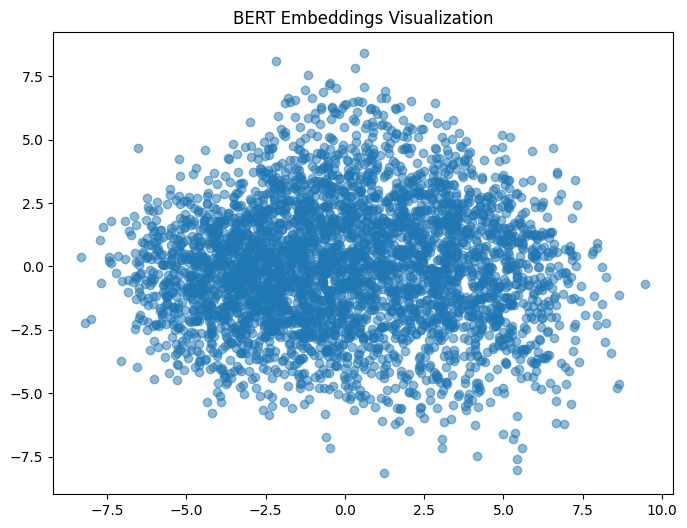

In [17]:
pca = PCA()

embs_bert = pca.fit_transform(train_embeddings)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("BERT Embeddings Visualization")
ax.scatter(embs_bert[:, 0], embs_bert[:, 1], alpha=0.5);

In [18]:
cosine_sim = cosine_similarity(test_embeddings, train_embeddings)

# Retrieve top-k recommendations for each test movie
# Sorts recommendations in decreasing order of similarity score
top_k = 10
test_recommendations = {}

for i, row in unique_movies_test.iterrows():
    # Check if the test movie exists in the training data
    if row['tmdbId'] in unique_movies_train['tmdbId'].values:
        # Find indices of movies with highest similarity (excluding the movie itself)
        similar_movies_indices = cosine_sim[i].argsort()[:-1][::-1][:top_k]
        # Retrieve the tmdbId and similarity scores of the recommended movies
        recommended_movies_with_scores = [
            (unique_movies_train.iloc[idx]['tmdbId'], cosine_sim[i, idx])
            for idx in similar_movies_indices
        ]
        # Sort recommended movies by decreasing similarity score
        recommended_movies_with_scores.sort(key=lambda x: x[1], reverse=True)

        recommended_movies = [movie[0] for movie in recommended_movies_with_scores]

    else:
        # Handle the case where the test movie doesn't exist in the training data
        # Calculate embedding for the unseen movie
        unseen_embedding = model.encode([row['overview']])
        # Compute similarity with all training embeddings
        similarity_scores = cosine_similarity(unseen_embedding, train_embeddings)
        # Find indices of movies with highest similarity
        similar_movies_indices = similarity_scores[0].argsort()[:-top_k-1:-1]
        # Retrieve the tmdbId and similarity scores of the recommended movies
        recommended_movies_with_scores = [
            (unique_movies_train.iloc[idx]['tmdbId'], similarity_scores[0, idx])
            for idx in similar_movies_indices
        ]
        # Sort recommended movies by decreasing similarity score
        recommended_movies_with_scores.sort(key=lambda x: x[1], reverse=True)

        recommended_movies = [movie[0] for movie in recommended_movies_with_scores]

    # Store the recommendations for the current test movie
    test_recommendations[row['tmdbId']] = recommended_movies


## Explore Recommendations

In [19]:
def generate_recommendation_table(recommended_movie_ids, movie_data):
    # Filter movie_data based on recommended_movie_ids and select relevant columns
    recommendation_table = movie_data[movie_data['tmdbId'].isin(recommended_movie_ids)][['tmdbId', 'ml_title', 'overview']]

    # Create a dictionary to map tmdbId to its index in the recommended_movie_ids array
    id_index_mapping = {tmdb_id: index for index, tmdb_id in enumerate(recommended_movie_ids)}

    # Add a new column 'order' based on the order in recommended_movie_ids
    recommendation_table['order'] = recommendation_table['tmdbId'].map(id_index_mapping)

    # Sort the DataFrame based on the 'order' column
    recommendation_table = recommendation_table.sort_values(by='order')

    # Drop the 'order' column as it's no longer needed
    recommendation_table = recommendation_table.drop('order', axis=1)

    return recommendation_table

In [20]:
unique_movies_test[unique_movies_test['tmdbId'] == 9700][['tmdbId', 'ml_title', 'keywords']]

,tmdbId,ml_title,keywords
3326,9700,"Lost City, The (2005)","cuba, fidel castro, che guevara"


In [21]:
test_unseen_movie = test_recommendations[9700]

generate_recommendation_table(test_unseen_movie, unique_movies_train)

,tmdbId,ml_title,overview
9,8012,Get Shorty (1995),Chili Palmer is a Miami mobster who gets sent ...
3628,32316,Marci X (2003),A Jewish-American Princess is forced to take c...
2336,2001,We Own the Night (2007),A New York nightclub manager tries to save his...
2924,7515,London (2005),London is a drug laden adventure that centers ...
2853,124459,"Incredible Burt Wonderstone, The (2013)",After breaking up with his longtime stage part...
799,120467,"Grand Budapest Hotel, The (2014)",The Grand Budapest Hotel tells of a legendary ...
745,4133,Blow (2001),A boy named George Jung grows up in a struggli...
1246,11382,Bullets Over Broadway (1994),"Set in 1920's New York City, this movie tells ..."
2569,86838,Seven Psychopaths (2012),A struggling screenwriter inadvertently become...
474,240,"Godfather: Part II, The (1974)",In the continuing saga of the Corleone crime f...


## Evaluation Metrics

In [22]:
def calculate_precision_at_k(test_recommendations, test_df, k=10):
    precision_scores = []
    unique_user_ids = test_df['userId'].unique()

    for user_id in unique_user_ids:
        # Retrieve user-specific data from the test set
        user_data = test_df[test_df['userId'] == user_id]

        # Initialize variables to store relevant and recommended movies
        # Retrieve unique movies that have been rated by the user
        # Each rating is considered as an interaction
        rated_movies = set(user_data['tmdbId'])

        precision_by_user = []

        # Iterate over movies rated by the user
        for _, movie_row in user_data.iterrows():
            movie_id = movie_row['tmdbId']
            # Retrieve the list of 10 recommendations for the current movie
            recommendations_for_movie = set(test_recommendations.get(movie_id, []))

            # Retrieve recommended movies that are relevant
            relevant_movies = rated_movies & recommendations_for_movie

            # Calculate the precision@k for current movie for current user
            precision = len(relevant_movies) / k
            precision_by_user.append(precision)

        # Calculate average precision for the current user
        precision_temp = sum(precision_by_user) / len(precision_by_user)
        precision_scores.append(precision_temp)

    # Calculate the average precision across all users
    average_precision = sum(precision_scores) / len(precision_scores)

    return average_precision


In [23]:
def calculate_recall_at_k(test_recommendations, test_df, k=10):
    recall_scores = []
    unique_user_ids = test_df['userId'].unique()

    for user_id in unique_user_ids:
        # Retrieve user-specific data from the test set
        user_data = test_df[test_df['userId'] == user_id]

        # Initialize variables to store relevant and recommended movies
        # Retrieve unique movies that have been rated by the user
        # Each rating is considered as an interaction
        rated_movies = set(user_data['tmdbId'])
        num_of_rated_movies = len(rated_movies)

        recall_by_user = []

        # Iterate over movies rated by the user
        for _, movie_row in user_data.iterrows():
            movie_id = movie_row['tmdbId']
            # Retrieve the list of 10 recommendations for the current movie
            recommendations_for_movie = set(test_recommendations.get(movie_id, []))

            # Retrieve recommended movies that are relevant
            relevant_movies = rated_movies & recommendations_for_movie

            # Calculate the recall@k for the current movie for the current user
            recall = len(relevant_movies) / num_of_rated_movies if num_of_rated_movies > 0 else 0
            recall_by_user.append(recall)

        # Calculate average recall for the current user
        recall_temp = sum(recall_by_user) / len(recall_by_user)
        recall_scores.append(recall_temp)

    # Calculate the average recall across all users
    average_recall = sum(recall_scores) / len(recall_scores)

    return average_recall


In [24]:
def calculate_f1_at_k(precision_at_k, recall_at_k):
    f1_score = 2 * (precision_at_k * recall_at_k) / (precision_at_k + recall_at_k)
    return f1_score

In [25]:
def calculate_ndcg_at_k(test_recommendations, test_df, k=10):
    ndcg_scores = []
    unique_user_ids = test_df['userId'].unique()

    for user_id in unique_user_ids:
        # Retrieve user-specific data from the test set
        user_data = test_df[test_df['userId'] == user_id]

        # Initialize variables to store relevant and recommended movies
        # Retrieve unique movies that have been rated by the user
        # Each rating is considered as an interaction
        rated_movies = set(user_data['tmdbId'])

        ndcg_by_user = []

        # Iterate over movies rated by the user
        for _, movie_row in user_data.iterrows():
            movie_id = movie_row['tmdbId']
            # Retrieve the list of 10 recommendations for the current movie
            recommendations_for_movie = set(test_recommendations.get(movie_id, []))

            # Convert precision values to binary relevance scores
            relevance_scores = [1 if movie in rated_movies else 0 for movie in recommendations_for_movie]

            # Calculate NDCG@k for current movie for current user
            ndcg = ndcg_at_k(relevance_scores, k)
            ndcg_by_user.append(ndcg)

        # Calculate average NDCG for the current user
        ndcg_temp = sum(ndcg_by_user) / len(ndcg_by_user)
        ndcg_scores.append(ndcg_temp)

    # Calculate the average NDCG across all users
    average_ndcg = sum(ndcg_scores) / len(ndcg_scores)

    return average_ndcg

def ndcg_at_k(relevance_scores, k):
    # Discounted Cumulative Gain (DCG)
    dcg = np.sum((2**np.array(relevance_scores) - 1) / np.log2(np.arange(2, len(relevance_scores) + 2)))

    # Ideal Discounted Cumulative Gain (IDCG)
    ideal_scores = sorted(relevance_scores, reverse=True)
    idcg = np.sum((2**np.array(ideal_scores) - 1) / np.log2(np.arange(2, k + 2)))

    # Normalized Discounted Cumulative Gain (NDCG)
    ndcg = dcg / idcg if idcg > 0 else 0.0

    return ndcg

In [26]:
print('Top k recommendations - k = 10')
avg_precision = calculate_precision_at_k(test_recommendations, test_df)
print(f'Average Precision at k: {avg_precision}')

avg_recall = calculate_recall_at_k(test_recommendations, test_df)
print(f'Average Recall at k: {avg_recall}')

avg_f1_score = calculate_f1_at_k(avg_precision, avg_recall)
print(f'Average F1 Score at k: {avg_f1_score}')

avg_ndcg = calculate_ndcg_at_k(test_recommendations, test_df)
print(f'Average NDCG at k: {avg_ndcg}')


Top k recommendations - k = 10
Average Precision at k: 0.010215162711823132
Average Recall at k: 0.005196411539297374
Average F1 Score at k: 0.006888613522094748
Average NDCG at k: 0.042941158421780076
